In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from timeit import default_timer as timer
from matrixMath import Knotilus
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/pw_data3_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, logging=True)
end = timer()

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
# for knot in knotVals:
#     print('Knot:', knot)

plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
# for knot in np.sort(model.knotLoc)[1:]:
    # plt.axvline(knot, color='purple')

Knot: 4   Iteration: 149   SSE: 8.502587526802044

Time: 1.35727134400031


2021-01-18 16:21:32,565 - matplotlib.animation - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.
2021-01-18 16:21:32,573 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


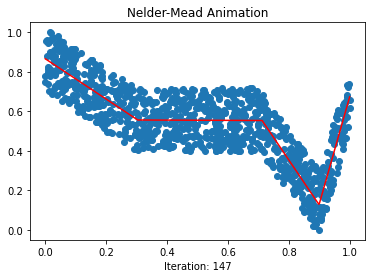

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

method = 'Nelder-Mead'

model.knotLoc = model.log[0]['knotLoc']
model.coef = model.log[0]['coef']
model.knots = model.CreateKnots(model.variable, model.knotLoc)
ax.set_title(f'{method} Animation')
ax.scatter(foo[0], foo[1])
line, = ax.plot(foo[0], model.predict(), 'r')

def animate(i):
    model.knotLoc = model.log[i+1]['knotLoc']
    model.coef = model.log[i+1]['coef']
    model.knots = model.CreateKnots(model.variable, model.knotLoc)
    line.set_ydata(model.predict())  # update the data.
    ax.set_xlabel(f'Iteration: {i}')
    return line,

ani = animation.FuncAnimation(fig, animate, interval=10, blit=True, save_count=len(model.log)-1)
ani.save("movie.gif", dpi=150)

In [4]:
fig, ax = plt.subplots()
model.knotLoc = model.log[-1]['knotLoc']
model.coef = model.log[-1]['coef']
model.knots = model.CreateKnots(model.variable, model.knotLoc)
plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
plt.show()

In [50]:
model.knotLoc

array([-0.00206162,  0.30330024,  0.71219491,  0.89941979])

In [51]:
model.log[-1]['knotLoc']

[0.0, 0.2482482482482482, 0.5059059059059058, 0.7545545545545546]

In [15]:
model.predict()

ValueError: shapes (1000,4) and (1,) not aligned: 4 (dim 1) != 1 (dim 0)

2021-01-18 14:39:35,908 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2021-01-18 14:39:35,911 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9


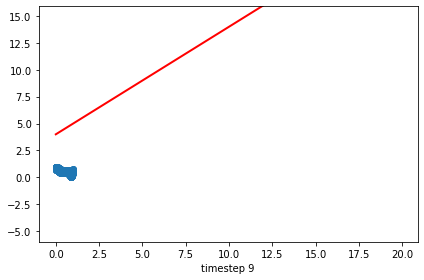

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
anim.save('line.gif', dpi=80, writer='imagemagick')
# plt.show() will just loop the animation forever.
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df = pd.read_csv('./data/pw_data3_500.csv')
ss  = StandardScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(optim='trust-krylov', numKnots=3, verbose=True)
end = timer()

In [ ]:
print('Time:', end - start)
knotVals = np.sort(model['results'].x[-1 * (3+1):])
for knot in knotVals:
    print('Knot:', ss.inverse_transform([knot, 0])[0])

In [2]:
df = pd.read_csv('./data/pw_data5_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=3, gamma=.5, verbose=True)
end = timer()

print('\n\nTime:', end - start)
knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
for knot in knotVals:
    print('Knot:', knot)

plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
for knot in np.sort(model.knotloc)[1:]:
    plt.axvline(knot, color='purple')

Knot: 3   Iteration: 1400   SSE: 17.11310613824745

Time: 18.643563545999314
Knot: 0.1902037402923849
Knot: 0.46181540306061686
Knot: 0.6178755000759759
Knot: 5.402366817044257


Knot: 5   Iteration: 2201   SSE: 4.069548242532262

Time: 45.10141580199979
Knot: -0.05632616815020714
Knot: 0.28917061867675276
Knot: 0.7078239494139951
Knot: 0.8968294867758266
Knot: 7.953747936193789


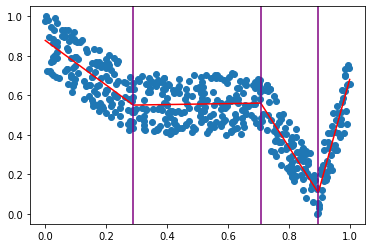

In [3]:
df = pd.read_csv('./data/pw_data3_500.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots='auto', alpha=1e-5, verbose=True)
end = timer()

print('\n\nTime:', end - start)
knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
for knot in knotVals:
    print('Knot:', knot)

plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
for knot in np.sort(model.knotloc)[1:]:
    plt.axvline(knot, color='purple')

In [ ]:
df = pd.read_csv('./data/pw_data5_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots='auto', alpha=1e-5, verbose=True)
end = timer()

print('\n\nTime:', end - start)
knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
for knot in knotVals:
    print('Knot:', knot)

plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
for knot in np.sort(model.knotloc)[1:]:
    plt.axvline(knot, color='purple')

In [66]:
df = pd.read_csv('./data/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

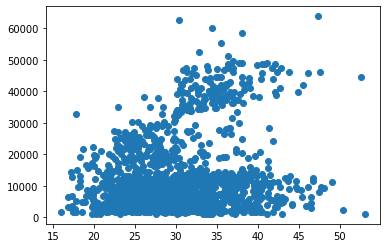

In [69]:
plt.scatter(df['bmi'], df['charges'])

Knot: 5   Iteration: 2200   SSE: 47.64235860234821

Time: 108.54008933299974
Knot: 0.33247253023474965
Knot: 0.3629254858241959
Knot: 0.370903321008634
Knot: 0.5494714934231653
Knot: 13.716701202952716


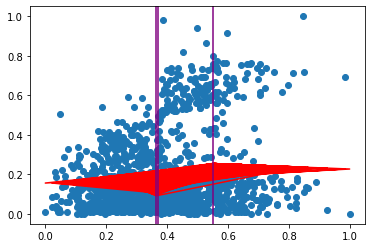

In [71]:
# df[['date', 'deathIncrease']]
df = pd.read_csv('./data/insurance.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df[['bmi', 'charges']])
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots='auto', alpha=1e-5, gamma=1e-5, verbose=True)
end = timer()

print('\n\nTime:', end - start)
knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
for knot in knotVals:
    print('Knot:', knot)

plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
for knot in np.sort(model.knotloc)[1:]:
    plt.axvline(knot, color='purple')

In [22]:
print('Time:', end - start)
knotVals = np.sort(model.results.x[-1 * (4+1):])
for knot in knotVals:
    print('Knot:', ss.inverse_transform(np.array([knot, 0]).reshape(1, -1))[0][0])


Time: 72.117486316
Knot: -557.1800793583069
Knot: -197.4426822961124
Knot: 210.96025865085184
Knot: 400.2810116591073
Knot: 7222.2434114826065


In [29]:
foo[1][i]

0.7488222798350155

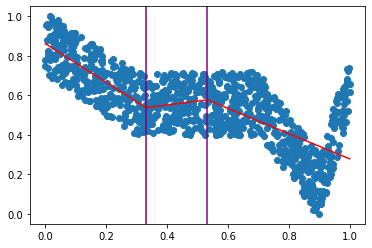

In [40]:
plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
for knot in np.sort(model.knotloc)[1:]:
    plt.axvline(knot, color='purple')

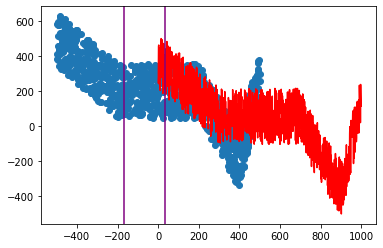

In [33]:
plt.scatter(df['predict'], df['predictor'])
plt.plot(ypred, 'r')
for knot in np.sort(model.knotloc)[1:]:
    plt.axvline(ss.inverse_transform(np.array([knot, 0]).reshape(1, -1))[0][0], color='purple')

In [2]:
df = pd.read_csv('./data/pw_data3_500.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=3, verbose=True)
end = timer()

Iteration: 694   SSE: 8.086390421852919

In [3]:
print('Time:', end - start)
knotVals = np.sort(model.results.x[-1 * (3+1):])
for knot in knotVals:
    print('Knot:', ss.inverse_transform(np.array([knot, 0]).reshape(1, -1))[0][0])


Time: 23.85560828499996
Knot: -1092.9983838740677
Knot: -500.7320256353883
Knot: -214.32829041194876
Knot: 59.71202386657067


# Covid-19 Death Increases in Time Series

Knot: 7   Iteration: 410   SSE: 3.8993682312187823

Time: 2.9576876119999724
Knot: 0.1938485762194378
Knot: 0.24963254259625484
Knot: 0.4796627355313947
Knot: 0.597635592993772
Knot: 0.8047895064353496
Knot: 0.9134647279695916


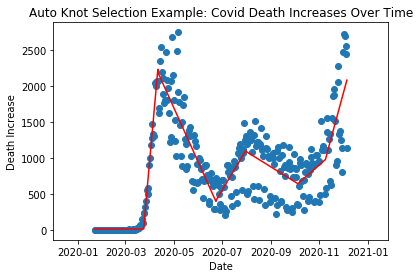

In [18]:
df = pd.read_csv('./data/us_covid19_daily.csv')
df['deathIncrease'] = df['deathIncrease'].astype(int)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['unixTime'] = df['date'].astype(int) / 10**9
df = df[['unixTime', 'deathIncrease']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])

model = model.fit(numKnots='auto', gamma=1e-4, alpha=5e-3, verbose=True)
end = timer()

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
knotVals = np.sort(model.knotLoc)
for knot in knotVals:
    print('Knot:', knot)

import matplotlib.dates as dates

fig, ax = plt.subplots()
plt.title('Auto Knot Selection Example: Covid Death Increases Over Time')
invModel = ss.inverse_transform(np.array(list(zip(model.variable, model.target))))
invDate = pd.to_datetime(invModel[:,0], unit='s')
plt.scatter(invDate, invModel[:,1])

plt.xlabel('Date')
plt.ylabel('Death Increase')

model.knots = model.CreateKnots(np.arange(1000)/1000, model.knotLoc)
predModel = ss.inverse_transform(np.array(list(zip(np.arange(1000)/1000, model.predict()))))
predDate = pd.to_datetime(predModel[:,0], unit='s')
plt.plot(predDate, predModel[:,1], 'r')

plt.savefig('./covid_deaths_auto.png')
plt.show()


# Bike Sharing Dataset

In [75]:
df = pd.read_csv('./data/Bike-Sharing-Dataset/day.csv')
df = df[['temp', 'cnt']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])

# 2, 8
model = model.fit(numKnots='auto', folds=5, gamma=1e-2, alpha=1, verbose=True)
end = timer()

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
knotVals = np.sort(model.knotLoc)
for knot in knotVals:
    print('Knot:', knot)

import matplotlib.dates as dates

fig, ax = plt.subplots()
plt.title(f'Alpha {model.alpha}: Bike Sharing and Temperature')
invModel = ss.inverse_transform(np.array(list(zip(model.variable, model.target))))
plt.scatter(invModel[:,0], invModel[:,1])

plt.xlabel('Temperature')
plt.ylabel('Bikes Used')

model.knots = model.CreateKnots(np.arange(1000)/1000, model.knotLoc)
predModel = ss.inverse_transform(np.array(list(zip(np.arange(1000)/1000, model.predict()))))
plt.plot(predModel[:,0], predModel[:,1], 'r')

plt.savefig(f'./bike_sharing_auto_alpha{model.alpha}.png')
plt.show()


TypeError: fit() got an unexpected keyword argument 'folds'

# Cross Validation

In [73]:
df = pd.read_csv('./data/us_covid19_daily.csv')
df['deathIncrease'] = df['deathIncrease'].astype(int)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['unixTime'] = df['date'].astype(int) / 10**9
df = df[['unixTime', 'deathIncrease']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])

model = model.fit_cv(folds=10, numKnots='auto', gamma=1e-4, alpha=1e-3, verbose=True)

end = timer()

print('\n\nTime:', end - start)

knotVals = np.sort(model.knotLoc)
for knot in knotVals:
    print('Knot:', knot)

fig, ax = plt.subplots()
plt.title('Auto Knot Selection Example: Covid Death Increases Over Time')
invModel = ss.inverse_transform(np.array(list(zip(model.variable, model.target))))
invDate = pd.to_datetime(invModel[:,0], unit='s')
plt.scatter(invDate, invModel[:,1])

plt.xlabel('Date')
plt.ylabel('Death Increase')

model.knots = model.CreateKnots(np.arange(1000)/1000, model.knotLoc)
predModel = ss.inverse_transform(np.array(list(zip(np.arange(1000)/1000, model.predict()))))
predDate = pd.to_datetime(predModel[:,0], unit='s')
plt.plot(predDate, predModel[:,1], 'r')

plt.savefig('./covid_deaths_auto.png')
plt.show()


[-2.72882259e+10  5.92109291e+09 -2.95369352e+10  2.96270072e+10
 -8.89882259e+10  1.76218097e+10  6.53552513e+10]
[-2.30052973e+10  1.73700560e+00  3.39339905e+11 -1.89536785e+11
 -3.84461011e+10 -1.89536785e+11  1.90507545e+11 -1.12327778e+11]
[-7.67661458e+10  0.00000000e+00  2.86433773e+08  7.29452783e+10
 -4.16862595e+11  7.23921597e+10  3.47217793e+10  2.36803378e+11]
[-5.17953340e+10  0.00000000e+00 -1.59587859e+09 -9.66286652e+10
 -7.35126774e+10  8.77484078e+10 -9.70789196e+10  1.79471854e+11]
[ 6.72062967e+10  0.00000000e+00 -1.41113542e+12  1.41113542e+12]
[-6.01177629e+11 -1.68663095e+12  0.00000000e+00  1.68663095e+12]
[-9.53701111e+10 -8.17710263e+10  0.00000000e+00  8.17710263e+10]
[  0.05818407 -54.47247291   0.           7.51853345]
[9.61177794e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.06767803e+01]
[0. 0. 0. 0. 0. 0. 0.]


Time: 24.833058759999403
Knot: 0.19273587023307814
Knot: 0.2501443994707796


In [78]:
df = pd.read_csv('./data/Bike-Sharing-Dataset/day.csv')
df = df[['temp', 'cnt']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])

# 2, 8
model = model.fit_cv(numKnots='auto', folds=5, gamma=1e-2, alpha=1e-4, verbose=True)
end = timer()

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
knotVals = np.sort(model.knotLoc)
for knot in knotVals:
    print('Knot:', knot)

import matplotlib.dates as dates

fig, ax = plt.subplots()
plt.title(f'Alpha {model.alpha}: Bike Sharing and Temperature')
invModel = ss.inverse_transform(np.array(list(zip(model.variable, model.target))))
plt.scatter(invModel[:,0], invModel[:,1])

plt.xlabel('Temperature')
plt.ylabel('Bikes Used')

model.knots = model.CreateKnots(np.arange(1000)/1000, model.knotLoc)
predModel = ss.inverse_transform(np.array(list(zip(np.arange(1000)/1000, model.predict()))))
plt.plot(predModel[:,0], predModel[:,1], 'r')

plt.savefig(f'./bike_sharing_auto_alpha{model.alpha}.png')
plt.show()


[-0.20121357 -0.03961399  0.66934546]
[ 0.32351902  0.33861954 -0.73695735]
[0.28636019 0.45585613 3.51782498]
[ 0.33251037  0.80098348 -0.92473531]
[ 0.28166207  1.17735069 -1.74525863]


Time: 2.869659091998983
Knot: -0.34247392614778827
Knot: 0.6168286381391728


# Tensorflow

In [1]:
# Quick work around to import packages in the parent directory
import sys
sys.path.insert(0,'..')

import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflowImplementation import Knotilus

In [2]:
df = pd.read_csv('../data/Bike-Sharing-Dataset/day.csv')
df = df[['temp', 'cnt']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

In [3]:
variable = tf.convert_to_tensor(foo[0])
target   = tf.convert_to_tensor(foo[1])
knotLoc  = tf.convert_to_tensor([0.28166207, 1.17735069, -1.74525863])

In [12]:
def SofterMax(x):
    alpha = 1e-8
    if x > 0 and x <= alpha:
        return round(3 * alpha**(-4) * x**5 - 8 * alpha**(-3) * x**4 + 6 * alpha**(-2) * x**3, 8)
    elif x > alpha:
        return x
    else:
        return 0

In [4]:
model = Knotilus(foo[0], foo[1])

In [14]:
tf.vectorized_map(SofterMax, variable)

OperatorNotAllowedInGraphError: in user code:

    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/ops/parallel_for/control_flow_ops.py:188 f  *
        iters,
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/ops/parallel_for/control_flow_ops.py:248 _pfor_impl  **
        loop_fn_outputs = loop_fn(loop_var)
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/ops/parallel_for/control_flow_ops.py:472 loop_fn
        return fn(gathered_elems)
    <ipython-input-12-c0fa22c0502d>:3 SofterMax
        if x > 0 and x <= alpha:
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:885 __bool__
        self._disallow_bool_casting()
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:488 _disallow_bool_casting
        self._disallow_when_autograph_enabled(
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:474 _disallow_when_autograph_enabled
        raise errors.OperatorNotAllowedInGraphError(

    OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.


In [5]:
model.CreateKnots(model.variable, knotLoc)

ValueError: in user code:

    ../tensorflowImplementation.py:33 SofterMax  *
        if x > 0 and x <= self.alpha:
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/autograph/operators/logical.py:47 and_
        return _tf_lazy_and(a_val, b)
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/autograph/operators/logical.py:54 _tf_lazy_and
        return control_flow_ops.cond(cond, b, lambda: cond)
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py:538 new_func
        return func(*args, **kwargs)
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py:1207 cond
        if pred:
    /home/nolan/.pyenv/versions/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:992 __bool__
        return bool(self._numpy())

    ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


In [2]:
import numpy as np

In [12]:
np.linspace(1e-8, 1e-1, num=5)

array([1.00000000e-08, 2.50000075e-02, 5.00000050e-02, 7.50000025e-02,
       1.00000000e-01])